This part is derived from the official TensorFLow documentation for Keras. Keras is an high level API which intends to simplify the contruction and training of neural networks. It provides an abstraction layer so that it can be used with different frameworks like PyTorch. Since Google acquired Keras it is also embedded natively into the TensorFlow ecosystem.

We start by including the necessary utilities.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Here we print the TensorFlow version
print(tf.__version__)

2.1.0


We use in this example the [Fashion MNIST dataset](https://www.tensorflow.org/tutorials/keras/classification). It cosists of images of fashion articles from Zalando. It is already part of Keras, so we can simply load the data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


Fashion-MNIST is distributed into two sets. A training set and a test set for evaluation purposes. Each image in the dataset is mapped to a label that represent a class. We have 10 classes that are laballed from 0 to 9. For each label we declare now a class name.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

There are 60000 training images with an format of 28 x 28 pixels and 60000 corresponding labels.

In [6]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We have 10000 test images.

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

# Process the Data
The data need to be pre-processed. The color values fall in the range from 0 to 255.

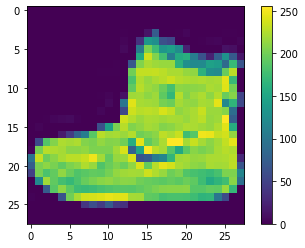

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We need to normalise the values from 0 to 1.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Now we verify that the data is in the correct format to ensure that we can build and train a neural network. The following code displays the 25 first elements of the training data set.

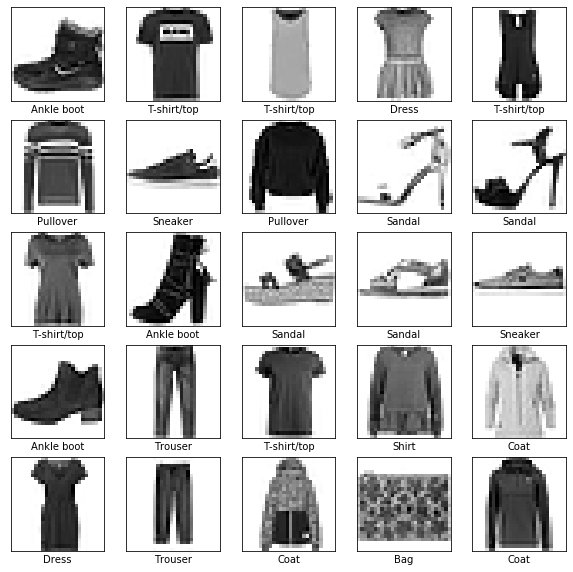

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the Model

A neural network is also called model. this part intends to build the model.

## Set up the Layers

A neural network is comprised of a number of layers. These layers can be seen as building blocks. A layer looks on an image for a specific meaningfull feature in the data that is passed through it. So each layer is responsible for another feature. The deeper the network (the numbers of layers) is the more complex data structure can be worked on.

We start by declaring a Keras object and chaining some layers together in a sequence.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The layer is the flatten layer. Its purpose is to transform a 2 dimensional array into a 1 dimensional array. The 2 dimensional array is an array of pixels from an input image (28 x 28 pixels).

Followed by the flatten layer a sequence of dense layers are following. Dense layers are fully connected layers. The first dense layer has 128 neurons (or nodes) and the second has 10 neurons which return 10 scores that indicate to which class an image belongs.

## Compile the Model

Now a few more settings need to be set before training.
* Loss Function: For the measument of the models accuracy. it should push the training into the right direction.
* Optimzer: With respect of the output of the loss function the optimzer updates the neural network.
* Metrics: Metrics are used to observe the training progression of the model. E.g. the accuracy metric shows the number of images that are classified correctly during a training iteration.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the Model

The training is progressing in four steps. It starts by feeding the model with the training images and labels. Then the model learns to associate images and labels, it learns. In the third step the model makes predictions on the test set and verifies the results on the test labels. This is all repeated in a number of iterations.

### Feed the Model

The training is started by calling the model.fit method. In this example we determined 10 training roaunds (epochs). As you can observe, the loss number is decreasing while the accuracy is increasing. In the end we have an accuracy of about 0.91 or 91%.

In [16]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.5005 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3757 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3368 - accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3116 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2916 - accuracy: 0.8941
Epoch 6/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2772 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2673 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2562 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2479 - accuracy: 0.907

### Evaluate the Accuracy

Now we evaluate the model on the test data set.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3482 - accuracy: 0.8806

Test accuracy: 0.8806


It should turn out that the accuracy on the test set is worse than on the training set. This gap is called overfitting. If a model is trained too much it starts to memorise details (like noise) in the training data to a point such that the performance model is impacted negatively.

### Make Predictions

The model can now be used to make predictions.

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([6.9216439e-05, 2.2378291e-08, 1.8626866e-05, 3.2813777e-08,
       6.1980721e-08, 4.4372641e-03, 4.6221567e-06, 4.3517757e-02,
       4.6295636e-06, 9.5194781e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:


In [21]:
np.argmax(predictions[0])

9

The output says that the model is confident that image is an ankle boot.

In [22]:
test_labels[0]

9

### Verify the Predictions

We now want to plot the results for the verification.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Here, the first image is predicted. The blue output is correct prediction. Red is an incorrect prediction.

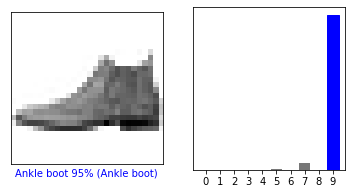

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Another example.

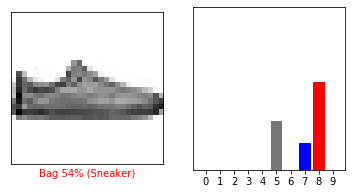

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Here are several images with their results.

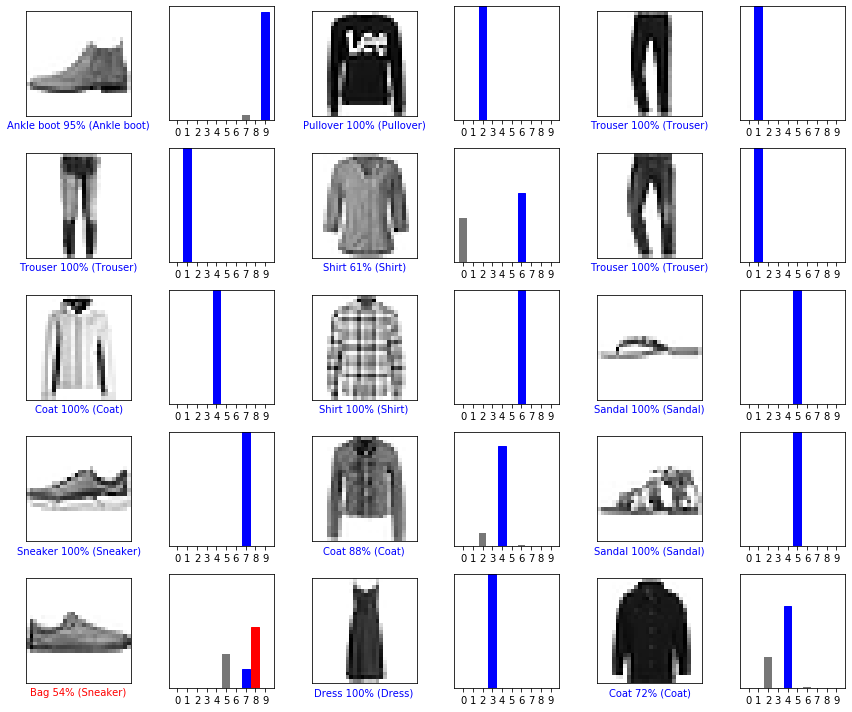

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## User the trained Model

The model can now be used on a single image.

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
# Predict the correct label
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.5711224e-06 7.9615360e-17 9.9931335e-01 4.9959384e-11 5.7138427e-04
  1.8201539e-18 1.1366265e-04 1.2479620e-22 1.5650635e-13 1.7664735e-14]]


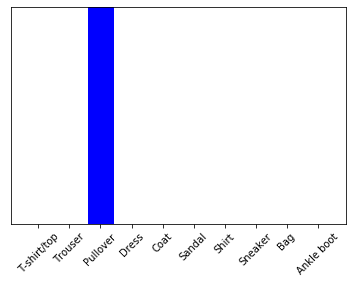

In [39]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

2